# This notebook manually generates the starting point for constrained MD simulation

In [7]:
from ase.io import read, write
from lib.topo import mkconst
import numpy as np

In [9]:
lastns = read('../exp/pinet2-scan/prod/gen8/nvt-340k-5ns-0/a16b16i16-r1.08/asemd.traj', index='40001::1000')
ratios = []
for i, atoms in enumerate(lastns):
    atoms, ratio = mkconst(atoms)
    print(1-ratio)
    ratios.append(1-ratio)
print(np.mean(ratios))

0.84375
0.90625
0.875
0.9375
0.90625
0.9375
0.90625
0.90625
0.9375
0.875
0.903125


In [16]:
lastns = read('../exp/scan/prod/gen49/nvt-300k-5ns-0/a16b16i16-r1.08/asemd.traj', index='40001::100')
ratio_cnt = {}
for i, atoms in enumerate(lastns):
    atoms, ratio = mkconst(atoms)
    if ratio not in ratio_cnt:
        ratio_cnt[ratio] = 1
    else:
        ratio_cnt[ratio] += 1
    if ratio_cnt[ratio]<=3 and ratio<0.3:
        write(f'../skel/scan-restart/300k-{ratio:.2f}-{i}.xyz', atoms)

In [17]:
lastns = read('../exp/hicut/prod/gen47/nvt-300k-5ns-0/a16b16i16-r1.08/asemd.traj', index='40001::100')
ratio_cnt = {}
for i, atoms in enumerate(lastns):
    atoms, ratio = mkconst(atoms)
    if ratio not in ratio_cnt:
        ratio_cnt[ratio] = 1
    else:
        ratio_cnt[ratio] += 1
    if ratio_cnt[ratio]<=3 and ratio<0.3:
        write(f'../skel/hicut-restart/300k-{ratio:.2f}-{i}.xyz', atoms)

In [2]:
lastns = read('../exp/transfer/prod/gen35/nvt-450k-5ns-0/a16b16i16-r1.08/asemd.traj', index='40001::1000')
for i, atoms in enumerate(lastns):
    atoms, ratio = mkconst(atoms)
    write(f'../skel/restart/450k-{i}-{ratio:.2f}.xyz', atoms)

In [3]:
lastns = read('../exp/transfer/prod/gen35/nvt-400k-5ns-0/a16b16i16-r1.08/asemd.traj', index='40001::1000')
for i, atoms in enumerate(lastns):
    atoms, ratio = mkconst(atoms)
    write(f'../skel/restart/400k-{i}-{ratio:.2f}.xyz', atoms)

In [4]:
lastns = read('../exp/prod-adam-run2/prod/gen30/nvt-340k-5ns-0/a16b16i16-r1.08/asemd.traj', index='40001::1000')
for i, atoms in enumerate(lastns):
    atoms, ratio = mkconst(atoms)
    write(f'../skel/restart/340k-{i}-{ratio:.2f}.xyz', atoms)

In [5]:
lastns = read('../exp/prod-adam-run2/prod/gen30/nvt-380k-5ns-0/a16b16i16-r1.08/asemd.traj', index='40001::1000')
for i, atoms in enumerate(lastns):
    atoms, ratio = mkconst(atoms)
    write(f'../skel/restart/380k-{i}-{ratio:.2f}.xyz', atoms)

## Testing constraint

In [38]:
from ase.io import read
import numpy as np
traj = read('../trajs/constmd/340k-0-0.22/asemd.traj', index='::50')

In [39]:
distances = np.array([[atoms.get_distance(*const.indices, mic=True) 
             for const in atoms.constraints] 
             for atoms in traj])

(array([   0.,    0.,    0.,    0.,    0.,    0.,   19.,  121.,  448.,
         958., 1591., 1992., 1986., 1725., 1349., 1022.,  749.,  526.,
         356.,  254.,  218.,  156.,  143.,  127.,   99.,  134.,  130.,
         131.,  131.,  133.,  129.,  155.,  164.,  194.,  202.,  199.,
         201.,  160.,  153.,  104.,   68.,   46.,   24.,   11.,    7.,
           3.,    2.,    0.,    0.]),
 array([0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ,
        1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14, 1.16, 1.18, 1.2 , 1.22,
        1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36, 1.38, 1.4 , 1.42, 1.44,
        1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66,
        1.68, 1.7 , 1.72, 1.74, 1.76, 1.78]),
 [<matplotlib.patches.Polygon at 0x7ff73e3cb850>])

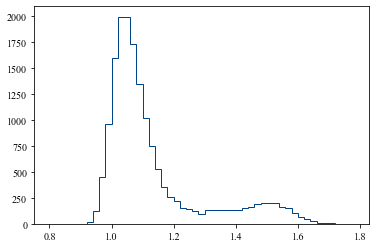

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(distances.flatten(), bins=np.arange(0.8,1.8,0.02), histtype='step')
plt.hist(distances.flatten(), bins=np.arange(0.8,1.8,0.02), histtype='step')
plt.hist(distances.flatten(), bins=np.arange(0.8,1.8,0.02), histtype='step')